In [64]:
# This is implementation of natural spline for problem 1 written by Jennie Wu
# Last Modified: Nov 12, 2021
# Input: nth point, x values, h values calculated from x values, f values, and calculated z values
# Expected Output: the value evaluated at x of the natural spline

import numpy as np
import math

def h_j(n, xValues):
    hj = np.zeros(n)
    for j in range(n):
        hj[j] = xValues[j + 1] - xValues[j]
    return hj

def a_j(n, hj):
    aj = np.zeros(n - 1)
    for j in range(1, n):
        aj[j - 1] = 2 * (hj[j - 1] + hj[j])
    return aj

def b_j(n, hj):
    bj = np.zeros(n - 2)
    for j in range(1, n - 1):
        bj[j - 1] = hj[j]
    return bj

def c_j(n, hj):
    cj = np.zeros(n - 2)
    for j in range(1, n - 1):
        cj[j - 1] = hj[j]
    return cj

def d_j(n, f, hj):
    dj = np.zeros(n - 1)
    for j in range(1, n):
        dj[j - 1] = -6 / hj[j - 1] * (f[j] - f[j - 1]) + 6 / hj[j] * (f[j + 1] - f[j])
    return dj

def fCoefficients(n, aj, bj, cj, dj):
    N = n - 1
    mj = np.zeros(N)
    lj = np.zeros(N - 1)
    mj[0] = aj[0]
    for j in range(1, N):
        lj[j - 1] = cj[j - 1] / mj[j - 1]
        mj[j] = aj[j] - lj[j - 1] * bj[j - 1]
    yj = np.zeros(N)
    yj[0] = dj[0]
    for i in range(2, N + 1):
        yj[i - 1] = dj[i - 1] - lj[i - 2] * yj[i - 2]
    xN = np.zeros(N)
    xN[N - 1] = yj[N - 1] / mj[N - 1]
    for k in range(N - 1, 0, -1):
        xN[k - 1] = (yj[k - 1] - bj[k - 1] * xN[k]) / mj[k - 1]
    return xN

hJ = h_j(4, [1, 2, 3, 4, 5])
fJ = [0, 1, 0, 1, 0]
xJ = fCoefficients(4, a_j(4, hJ), b_j(4, hJ), c_j(4, hJ), d_j(4, fJ, hJ))

def sJx(x, n, j, hj, zj, fj, xj):
    zj = np.insert(zj, 0, 0)
    zj = np.insert(zj, len(zj), 0)
    Aj = np.zeros(n)
    Bj = np.zeros(n)
    Cj = np.zeros(n)
    Dj = np.zeros(n)
    sjx = 0
    Aj[j] = 1 / (6 * hj[j]) * (zj[j + 1] - zj[j])
    Bj[j] = 1 / 2 * zj[j]
    Cj[j] = 1 / hj[j] * (fj[j + 1] - fj[j]) - 1 / 6 * hj[j] * (zj[j + 1] + 2 * zj[j])
    Dj[j] = fj[j]
    sjx = Aj[j] * (x - xj[j]) ** 3 + Bj[j] * (x - xj[j]) ** 2 + Cj[j] * (x - xj[j]) + Dj[j]
    return sjx

print(sJx(1.5, 4, 0, hJ, xJ, fJ, [1, 2, 3, 4, 5]))



0.7678571428571428


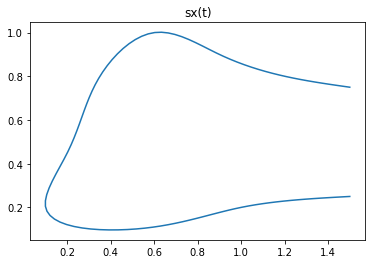

,Ax,Bx,Cx,Dx
0,0.010537,0.000000,-0.974898,1.50
1,0.102103,0.019535,-0.962825,0.90
2,0.987167,0.116635,-0.919659,0.60
3,-1.773549,1.064316,-0.541755,0.35
4,5.394568,-0.962851,-0.503097,0.20
5,-3.393333,3.390566,0.149959,0.10
6,0.670643,-0.803594,1.215791,0.50
7,-0.147442,0.222490,0.919428,1.00


,Ay,By,Cy,Dy
0,0.276944,0.000000,0.136947,0.75
1,-3.001012,0.513454,0.454261,0.90
2,2.430450,-2.340509,-0.124915,1.00
3,-0.273187,-0.007277,-0.876207,0.80
4,2.173896,-0.319530,-1.000720,0.45
5,-0.784397,1.434804,-0.700711,0.20
6,-0.474226,0.465289,0.082127,0.10
7,0.172483,-0.260277,0.186683,0.20


In [65]:
# This is implementation of natural spline written by Jennie Wu
# Last Modified: Nov 12, 202
# Input: t values, x values, y values and interval on which the x exists
# Expected Output: the plot of the parametric equation

import matplotlib.pyplot as plt
import pandas as pd

tj = [0, 0.618, 0.935, 1.255, 1.636, 1.905, 2.317, 2.827, 3.330]
xtJ = [1.50, 0.90, 0.60, 0.35, 0.20, 0.10, 0.50, 1.00, 1.50]
ytJ = [0.75, 0.90, 1.00, 0.80, 0.45, 0.20, 0.10, 0.20, 0.25]
test = [0.3, 0.7, 1, 1.3, 1.7, 2, 2.5, 3]

htJ = h_j(8, tj)
xt = fCoefficients(8, a_j(8, htJ), b_j(8, htJ), c_j(8, htJ), d_j(8, xtJ,htJ))
yt = fCoefficients(8, a_j(8, htJ), b_j(8, htJ), c_j(8, htJ), d_j(8, ytJ,htJ))

x = np.linspace(0, 3.33, 101)

def interval(t, tJ):
    for i in range(len(tJ)):
        if t <= tJ[i + 1]:
            return i

sxt = [sJx(i, 8, interval(i, tj), htJ, xt, xtJ, tj) for i in x]
syt = [sJx(i, 8, interval(i, tj), htJ, yt, ytJ, tj) for i in x]

#sxtexample = [sJx(i, 4, interval(i, [1, 2, 3, 4, 5]), hJ, xJ, fJ, [1, 2, 3, 4, 5]) for i in x]
#sytexample = [sJx(i, 4, interval(i, [1, 2, 3, 4, 5]), hJ, xJ, fJ, [1, 2, 3, 4, 5]) for i in x]

#plt.plot(x, sytexample)
#plt.show()

plt.plot(sxt, syt) 
plt.title("sx(t)")

plt.show()

def sJxtable(x, n, j, hj, zj, fj, xj):
    zj = np.insert(zj, 0, 0)
    zj = np.insert(zj, len(zj), 0)
    Aj = np.zeros(n)
    Bj = np.zeros(n)
    Cj = np.zeros(n)
    Dj = np.zeros(n)
    sjx = 0
    Aj[j] = 1 / (6 * hj[j]) * (zj[j + 1] - zj[j])
    Bj[j] = 1 / 2 * zj[j]
    Cj[j] = 1 / hj[j] * (fj[j + 1] - fj[j]) - 1 / 6 * hj[j] * (zj[j + 1] + 2 * zj[j])
    Dj[j] = fj[j]
    return [Aj[j], Bj[j], Cj[j], Dj[j]]

Ajx = []
Bjx = []
Cjx = []
Djx = []
Ajy = []
Bjy = []
Cjy = []
Djy = []
for i in range(len(tj) - 1):
    coefficientx = sJxtable(tj[i], 8, interval(test[i], tj), htJ, xt, xtJ, tj)
    coefficienty = sJxtable(tj[i], 8, interval(test[i], tj), htJ, yt, ytJ, tj)
    Ajx.append(coefficientx[0])
    Bjx.append(coefficientx[1])
    Cjx.append(coefficientx[2])
    Djx.append(coefficientx[3])
    Ajy.append(coefficienty[0])
    Bjy.append(coefficienty[1])
    Cjy.append(coefficienty[2])
    Djy.append(coefficienty[3])

datax = {'Ax': Ajx, 'Bx': Bjx, 'Cx': Cjx, 'Dx': Djx}    
datay = {'Ay': Ajy, 'By': Bjy, 'Cy': Cjy, 'Dy': Djy}

table1 = pd.DataFrame(datax)
table2 = pd.DataFrame(datay)
display(table1)
display(table2)